# Section 2.1 The impacts of full diallel crossing 

## Package was modified to allow complete cross mating


In [3]:
library("devtools")
install_github("gglinzijie/xbreed")
library("xbreed")

from URL https://api.github.com/repos/gglinzijie/xbreed/zipball/master
Installing xbreed
"C:/programming_language/R/bin/x64/R" --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  "C:/Users/lin/AppData/Local/Temp/RtmpopddIv/devtools2f241765e37/gglinzijie-xbreed-e32db83"  \
  --library="C:/programming_language/r/library" --install-tests 

("|-----------------------------------------------------|")
("|                      xbreed                         |")
("|    Genomic simulation of purebreds and crossbreds   |")
("|               March 2017 Version 1.0.1              |")
("|                                                     |")
("|             H.Esfandyari,A.C.Sorensen               |")
("| Center for Quantitative Qenetics and Genomics (QGG) |")
("|             Aarhus University,Denmark               |")
("|                                                     |")
("|-----------------------------------------------------|")
("|Questions and bugs: esfandyar

### Genome specification

In [4]:
#Number of markers per chr from chapter 1
lin_map<-read.table("raw.map")
m=1:22
for(i in 1:22) {m[i]=dim(lin_map[lin_map$V1==i,])[1]}
sum(m)

[1] 3928

In [5]:
#data from chaptre 1
geno<-read.table("Hetero_realigned_cov10_filtered3.raw")
pheno<-read.csv("2017heteroPheno.csv", header=T)
attach(pheno)

In [6]:
#parameter of genome
no.chr<-22
genome<-data.frame(matrix(NA, nrow=no.chr, ncol=6))
names(genome)<-c("chr","len","nmrk","mpos","nqtl","qpos")
genome$chr<-c(1:no.chr) #Chromosome id from 1 to 22
genome$len<-c(200,rep(100,21))#Chromosome length in cM
genome$nmrk<-c(m) #Number of markers, 3928 in total 
genome$mpos<-c('even') 
genome$nqtl<-c(40) #Number of qtl  40*22 = 880 in total
genome$qpos<-c('rnd')

### Historiacal population

In [7]:
#Historical population 
hp<-make_hp(hpsize=1000 ,ng=5000,h2=0.654,d2=0,phen_var=84,
            genome=genome,mutr=2.5*10**-4,laf=1)

---sel_seq_qtl is missing, it has been set to default value of 0
---sel_seq_mrk is missing, it has been set to default value of 0
Historical pop is initialized...
Simulating trait ...
Output data preparation ...
Establishment of historical population completed


In [19]:
# Expected Heterozygosity according to (Kimura and Crow 1964) 
mutr<-2.5*10**-4
ne<-1000 
k<-2 
Fneu<-4*ne*mutr 
(Expected_het1<-Fneu/(1+Fneu))
(Expected_het2<-1-((1+((Fneu)/(k-1)))/(1+((Fneu*k)/(k-1)))))
(het_observed<-mean(2*(hp$freqMrk[,3]*hp$freqMrk[,4])))

[1] 0.5

[1] 0.3333333

[1] 0.3953663

In [9]:
Male_founders<-data.frame(number=10,select='rnd')
Female_founders<-data.frame(number=10,select='rnd')

In [10]:
Selection<-data.frame(matrix(NA, nrow=2, ncol=3))
names(Selection)<-c('Number','type','Value') 
Selection$Number[1:2]<-c(10,10)
Selection$type[1:2]<-c('gebv','gebv')
Selection$Value[1:2]<-c('l','l')

In [11]:
# Training parameters for the estimation of marker effects. 
Training<-data.frame(matrix(NA, nrow=1, ncol=8))
names(Training)<-c('size','sel','method','nIter','burnIn','thin','save','show')
Training$size<-250
Training$sel<-'rnd'
Training$method<-'BayesC'
Training$nIter<-2000
Training$burnIn<-1000 
Training$thin<-5 
Training$save<-'bayes'
Training$show<-FALSE

In [12]:
sh_output<-data.frame(matrix(NA, nrow=11, ncol=1))
names(sh_output)<-c("data")
sh_output[,1]<-c(seq(0,10,1))

In [13]:
Selection$Number[1:2]<-c(10,10)
# 10 sires and 10 dams perform full diallel cressing to produce 10*10*10 = 1000 progenies.
RP10_cc<-sample_hp(hp_out=hp,Male_founders= Male_founders,
              Female_founders=Female_founders,ng=10,Selection=Selection,
              Training=Training,
              litter_size=10,saveAt="SNP3928_10",sh_output=sh_output,Display=FALSE)

Controlling input data ...
Intializing base population ...
Generation 0 started ......... 
Generation 0 is finished. Time taken: 12.54022
Generation 1 started ......... 
Generation 1 is finished. Time taken: 13.23952
Generation 2 started ......... 
Generation 2 is finished. Time taken: 12.49406
Generation 3 started ......... 
Generation 3 is finished. Time taken: 13.35129
Generation 4 started ......... 
Generation 4 is finished. Time taken: 12.7748
Generation 5 started ......... 
Generation 5 is finished. Time taken: 12.35735
Generation 6 started ......... 
Generation 6 is finished. Time taken: 12.53043
Generation 7 started ......... 
Generation 7 is finished. Time taken: 12.67322
Generation 8 started ......... 
Generation 8 is finished. Time taken: 12.99144
Generation 9 started ......... 
Generation 9 is finished. Time taken: 12.25433
Generation 10 started ......... 
Generation 10 is finished. Time taken: 12.69127
Output data preparation ...
Writing output files ...
Sampling hp is don

In [14]:
# Function for calculate the allele coding, which is 0, 1, 2
bin_snp<-function(mat){
s1<-seq(1,ncol(mat),2)
s2<-seq(2,ncol(mat),2)
a1<-mat[,s1]+mat[,s2]
a1[a1==3]=1
a1[a1==4]=0
snp_code<-a1
return(snp_code)
 }

In [15]:
# Function for calculation of heterozigosity
hetero_loci<-function(geno){
   n<-list()   
   n<-sum(geno==1)/(dim(geno)[1]*dim(geno)[2])
    return(n)
    }

In [16]:
hetecc<-list()
for (i in seq(1,10,1)){
n<-bin_snp(RP10_cc$output[[i+1]]$mrk[,3:7858])
hetecc[i]<-hetero_loci(n)}
gain<-list()
gain[1]<-0
for (i in seq(1,9,1)){
gain[i+1]<-abs(RP10_cc$summary_data$Phenotype[i+1]-RP10_cc$summary_data$Phenotype[1])
}
(fcc<-cbind(RP10_cc$summary_data,unlist(hetecc),unlist(gain)))

Generation,Phenotype,TrueBV,GEBV,M_accuracy,F_accuracy,heritability,unlist(hetecc),unlist(gain)
1,14.7080872,14.578930,-1.305986,0.7657465,0.7621859,0.6671791,0.3952195,0.00000
2,0.6009845,0.889738,-8.301450,0.6288753,0.6190406,0.4934025,0.3493139,14.10710
3,-8.4068410,-8.309596,-12.086170,0.7237761,0.6478737,0.6134671,0.3237103,23.11493
4,-17.6602505,-17.382533,2.349311,0.5966040,0.5665035,0.5156925,0.2990568,32.36834
5,-27.1716577,-27.191669,-2.441701,0.6813819,0.6996391,0.4900132,0.2592355,41.87974
6,-36.4420880,-36.325715,-6.717956,0.6819225,0.6321561,0.3691684,0.2110771,51.15018
7,-42.4574955,-42.596793,-7.079054,0.5137389,0.5600004,0.3184227,0.1940293,57.16558
8,-48.0566081,-47.982156,-3.216162,0.7455471,0.7182144,0.3704608,0.1823220,62.76470
9,-54.0146376,-54.038654,1.851814,0.5488063,0.5504276,0.2239618,0.1710188,68.72272
10,-58.4085007,-58.150932,-6.388326,0.5681872,0.6514194,0.2686808,0.1520005,73.11659


In [20]:
library("xlsx")
write.xlsx(fcc, "2.2fcc.xlsx") 

## Original xbreed


In [21]:
library("devtools")
install_github("cran/xbreed")
library("xbreed")

from URL https://api.github.com/repos/cran/xbreed/zipball/master
Installing xbreed
"C:/programming_language/R/bin/x64/R" --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  "C:/Users/lin/AppData/Local/Temp/RtmpopddIv/devtools2f242c009a/cran-xbreed-264fb94"  \
  --library="C:/programming_language/r/library" --install-tests 

Reloading installed xbreed
("|-----------------------------------------------------|")
("|                      xbreed                         |")
("|    Genomic simulation of purebreds and crossbreds   |")
("|               March 2017 Version 1.0.1              |")
("|                                                     |")
("|             H.Esfandyari,A.C.Sorensen               |")
("| Center for Quantitative Qenetics and Genomics (QGG) |")
("|             Aarhus University,Denmark               |")
("|                                                     |")
("|-----------------------------------------------------|")
("|Questions and b

In [ ]:
# 10 sires and 10 dams perform single pair mating to produce 10*100 = 100 progenies.
RP10_nocc<-sample_hp(hp_out=hp,Male_founders= Male_founders,
              Female_founders=Female_founders,ng=10,Selection=Selection,
              Training=Training,
              litter_size=100,saveAt="SNP3928_ncc",sh_output=sh_output,Display=FALSE)

In [53]:
hete<-list()
for (i in seq(1,10,1)){
n<-bin_snp(RP10_nocc$output[[i+1]]$mrk[,3:7858])
hete[i]<-hetero_loci(n)}
for (i in seq(1,9,1)){
gain[i+1]<-abs(RP10_nocc$summary_data$Phenotype[i+1]-RP10_nocc$summary_data$Phenotype[1])
}
(fnocc<-cbind(RP10_nocc$summary_data,unlist(hete),unlist(gain)))

Generation,Phenotype,TrueBV,GEBV,M_accuracy,F_accuracy,heritability,unlist(hete),unlist(gain)
1,14.682569,14.478334,-0.3628455,0.8176792,0.8198696,0.6829073,0.39590631,0.00000
2,2.232497,2.060189,4.9574035,0.7659951,0.7315190,0.4758015,0.28593024,12.45007
3,-5.621684,-5.613904,-7.1633135,0.6278530,0.5902660,0.3706593,0.23830117,20.30425
4,-11.438713,-11.274532,-6.9337312,0.6796939,0.7187948,0.3979275,0.22675662,26.12128
5,-15.785809,-15.778707,-2.6606829,0.5999974,0.5757610,0.3167830,0.19705957,30.46838
6,-23.271197,-23.131492,-6.2074202,0.6291051,0.6249988,0.2959675,0.16693075,37.95377
7,-28.782729,-28.873011,-8.2783810,0.6739883,0.6812832,0.3040785,0.13938595,43.46530
8,-35.334361,-35.329185,-7.9526510,0.5513620,0.5435248,0.2496089,0.10525407,50.01693
9,-36.839918,-37.022392,15.5210121,0.5788379,0.5681730,0.2247094,0.10429735,51.52249
10,-38.755593,-38.896725,24.3612179,0.6648804,0.6473467,0.1877287,0.09371385,53.43816


In [54]:
write.xlsx(fnocc, "2.2fnocc.xlsx") 

In [1]:
library("readxl")
fnocc<-read_excel("2.2fnocc.xlsx")
fcc<-read_excel("2.2fcc.xlsx")

In [2]:
plot<-data.frame(heterozygosity=c(unlist(fcc[,9]),unlist(fnocc[,9])),
                 heritability=c(unlist(fcc[,8]),unlist(fnocc[,8])),
                 selectionResponse=c(unlist(fcc[,10]),unlist(fnocc[,10])),
                 ng=as.factor(rep(seq(1,10,1),2)),
                 CompletCross=as.factor(rep(c("Yes","No"),each = 10)))

In [3]:
plot

,heterozygosity,heritability,selectionResponse,ng,CompletCross
unlist(hetecc)1,0.39521945,0.6671791,0.00000,1,Yes
unlist(hetecc)2,0.34931390,0.4934025,14.10710,2,Yes
unlist(hetecc)3,0.32371029,0.6134671,23.11493,3,Yes
unlist(hetecc)4,0.29905677,0.5156925,32.36834,4,Yes
unlist(hetecc)5,0.25923549,0.4900132,41.87974,5,Yes
unlist(hetecc)6,0.21107714,0.3691684,51.15018,6,Yes
unlist(hetecc)7,0.19402928,0.3184227,57.16558,7,Yes
unlist(hetecc)8,0.18232205,0.3704608,62.76470,8,Yes
unlist(hetecc)9,0.17101884,0.2239618,68.72272,9,Yes
unlist(hetecc)10,0.15200051,0.2686808,73.11659,10,Yes


In [4]:
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)
p <- ggplot(plot, aes(x=ng, y=heterozygosity,group=CompletCross)) + 
       geom_line(aes(color=CompletCross))+
       geom_point(aes(color=CompletCross))+    
       scale_colour_manual(values=c("red", "blue"),
                       name="Full diallel \n crossing")+
       labs(x = "Generation",y="Mean heterozygosity")+
       theme(axis.text.y= element_text(size = rel(1.2)),
             axis.text.x = element_text(size = rel(1.2)),
             text=element_text(size=10, family="serif"),
            legend.position="none")

In [5]:
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)
p1 <- ggplot(plot, aes(x=ng, y=heterozygosity,group=CompletCross)) + 
       geom_line(aes(color=CompletCross))+
       geom_point(aes(color=CompletCross))+    
       scale_colour_manual(values=c("red", "blue"),
                       name="Full diallel \n crossing")+
       labs(x = "Generation",y="Heritability")+
       theme(axis.text.y= element_text(size = rel(1.2)),
             axis.text.x = element_text(size = rel(1.2)),
             text=element_text(size=10, family="serif"),
             legend.position="none")

In [6]:
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)
p2 <- ggplot(plot, aes(x=ng, y=selectionResponse,group=CompletCross)) + 
       geom_line(aes(color=CompletCross))+
       geom_point(aes(color=CompletCross))+
       scale_colour_manual(values=c("red", "blue"),
                       name="Full diallel \n crossing")+
       labs(x = "Generation",y="AASR")+
       theme(axis.text.y= element_text(size = rel(1.2)),
             axis.text.x = element_text(size = rel(1.2)),
             text=element_text(size=10, family="serif"))



*******************************************************
Note: cowplot does not change the default ggplot2 theme
anymore. To recover the previous behavior, execute:
  theme_set(theme_cowplot())
*******************************************************



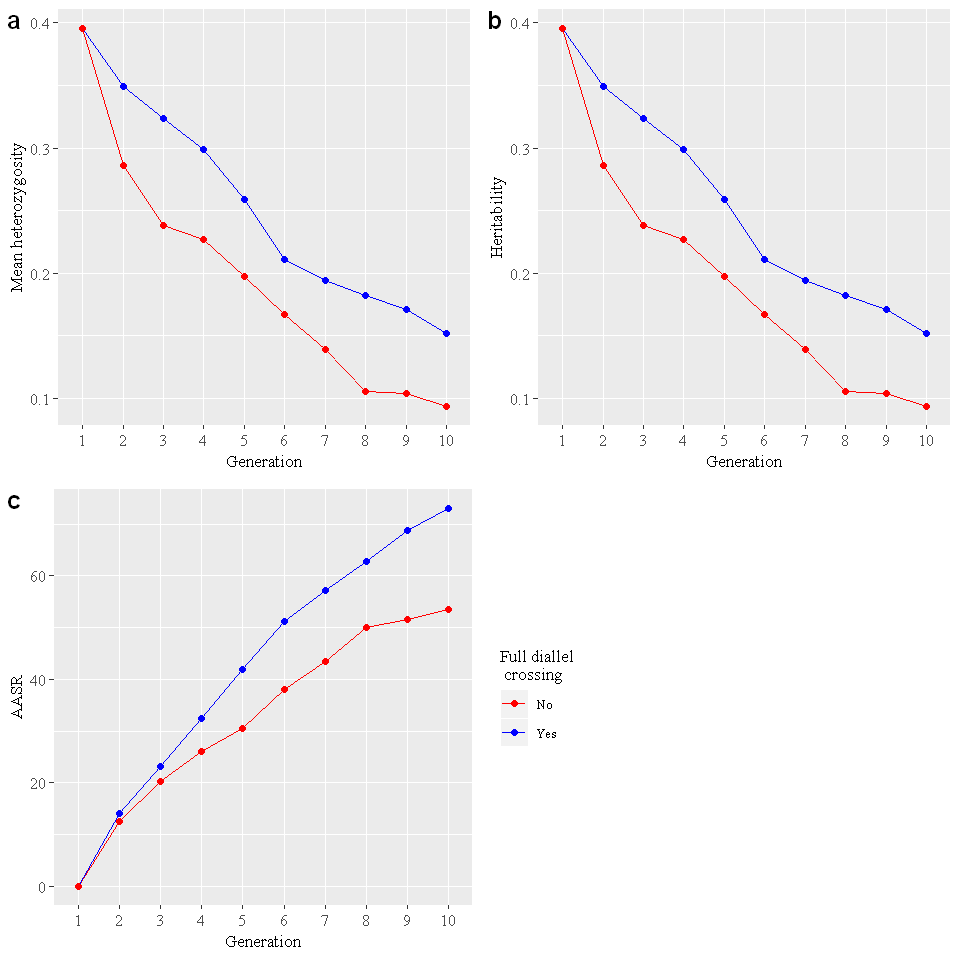

In [7]:
library("cowplot")
options(repr.plot.width=8, repr.plot.height=8)
all<- ggdraw() +
  draw_plot(p, x = 0, y = .5, width = .5, height = .5) +
  draw_plot(p1, x = .5, y = .5, width = .5, height = .5) +
  draw_plot(p2, x = 0, y = 0, width = .62, height = 0.5) +
  draw_plot_label(label = c("a", "b", "c"), size = 15,
                  x = c(0, 0.5, 0), y = c(1, 1, 0.5))
all

In [8]:
png("1.1FullDiallel.png", width=8, height=8, units="in", res=300)
all
dev.off()

png 
  2